In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load the dataset
data_path_houses = 'annonces_maison_expat_dakar.xlsx'
df_houses = pd.read_excel(data_path_houses, sheet_name='Sheet1')

In [3]:
# Visualiser les 5 premières lignes du dataframe
print(df_houses.head())

                                      Titre           Prix         Adresse  \
0                    Combine Beko 3 tiroirs  225 000 F Cfa  Colobane Dakar   
1                             Salon 7 place  550 000 F Cfa    Médina Dakar   
2                             Salon 7 place  550 000 F Cfa    Médina Dakar   
3                         Chambre à coucher  750 000 F Cfa    Médina Dakar   
4  Lots de 6 chaises style scandinave MALMÔ  165 000 F Cfa   Plateau Dakar   

     Etat                                        Description  
0  Venant  Réfrigérateur beko combiné 3 tiroirs original ...  
1    Neuf  Bienvenue chez mobilier confort Neveu arrivage...  
2    Neuf  Bienvenue chez mobilier confort Neveu arrivage...  
3    Neuf  Bienvenue chez mobilier confort Neveu arrivage...  
4    Neuf  Lots de 6 chaises style scandinave MALMÔ venan...  


In [4]:
# Obtenir des informations sur le dataframe
print(df_houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Titre        7069 non-null   object
 1   Prix         6769 non-null   object
 2   Adresse      7067 non-null   object
 3   Etat         7058 non-null   object
 4   Description  7068 non-null   object
dtypes: object(5)
memory usage: 276.3+ KB
None


In [5]:
# Data Preprocessing
# Remove currency symbols and convert Prix to numeric
df_houses['Prix'] = df_houses['Prix'].str.replace('\u202f', '').str.replace(' F Cfa', '').str.replace(' ', '').astype(float)


In [6]:
# Drop rows with missing target or features
df_houses = df_houses.dropna(subset=['Prix', 'Etat'])


In [7]:
# Convert categorical features to dummy variables
df_houses = pd.get_dummies(df_houses, columns=['Etat'], drop_first=True)

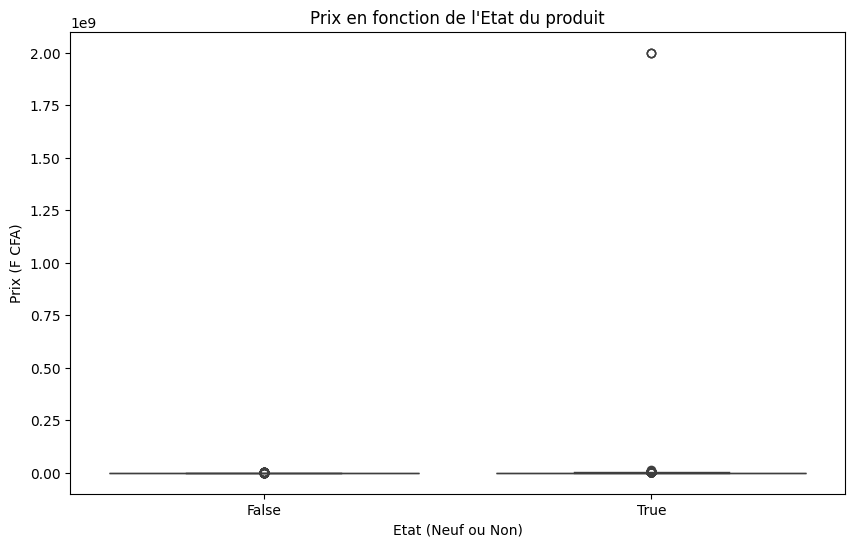

In [8]:
# EDA: Visualizing relationships
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_houses, x='Etat_Neuf', y='Prix')
plt.title('Prix en fonction de l\'Etat du produit')
plt.xlabel('Etat (Neuf ou Non)')
plt.ylabel('Prix (F CFA)')
plt.show()


In [9]:
# Splitting the dataset
X_houses = df_houses.drop(columns=['Prix', 'Titre', 'Adresse', 'Description'])
y_houses = df_houses['Prix']
X_train_houses, X_test_houses, y_train_houses, y_test_houses = train_test_split(X_houses, y_houses, test_size=0.2, random_state=42)


In [10]:
# Model Testing
models_houses = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [11]:
results_houses = {}
for name, model in models_houses.items():
    model.fit(X_train_houses, y_train_houses)
    predictions = model.predict(X_test_houses)
    mse = mean_squared_error(y_test_houses, predictions)
    r2 = r2_score(y_test_houses, predictions)
    results_houses[name] = {'MSE': mse, 'R2': r2}

In [12]:
# Select the best model
best_model_name_houses = max(results_houses, key=lambda x: results_houses[x]['R2'])
best_model_houses = models_houses[best_model_name_houses]

In [13]:
# Save the best model
model_path_houses = 'best_model_Maisons.pkl'
joblib.dump(best_model_houses, model_path_houses)

['best_model_Maisons.pkl']

In [14]:
# Display results
print(f"Best Model: {best_model_name_houses}")
print("Performance Metrics:")
for name, metrics in results_houses.items():
    print(f"{name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")


Best Model: Random Forest
Performance Metrics:
Linear Regression: MSE = 1582927296271.69, R2 = -6.31
Random Forest: MSE = 1486339215040.53, R2 = -5.86


In [ ]:
Les résultats montrent que les deux modèles, la régression linéaire et la forêt aléatoire, n'ont pas bien performé sur ce jeu de données. Voici quelques points clés :

1. **Erreur Quadratique Moyenne (MSE)** :
    - Régression Linéaire : 1582927296271.6943
    - Forêt Aléatoire : 1486339215040.5288

    Les valeurs de MSE sont très élevées, ce qui indique que les prédictions des modèles sont loin des valeurs réelles.

2. **Coefficient de Détermination (R²)** :
    - Régression Linéaire : -6.309328136945956
    - Forêt Aléatoire : -5.863322826721396

    Les valeurs de R² sont négatives, ce qui signifie que les modèles ne capturent pas du tout la variance des données. En fait, un R² négatif indique que le modèle est pire que la moyenne des valeurs observées.

Ces résultats suggèrent que les modèles actuels ne sont pas adaptés pour prédire les prix des maisons avec les caractéristiques fournies. Voici quelques suggestions pour améliorer les performances :

1. **Feature Engineering** : Ajouter ou transformer des caractéristiques pour mieux capturer les relations dans les données.
2. **Hyperparameter Tuning** : Ajuster les hyperparamètres des modèles pour améliorer leurs performances.
3. **Modèles Avancés** : Essayer des modèles plus complexes comme les réseaux de neurones ou les modèles de gradient boosting.
4. **Nettoyage des Données** : Vérifier s'il y a des anomalies ou des valeurs aberrantes dans les données qui pourraient affecter les performances des modèles.

Vous pouvez également visualiser les prédictions par rapport aux valeurs réelles pour mieux comprendre les erreurs des modèles.

In [ ]:
```markdown
## Propositions de Solutions pour Améliorer les Performances des Modèles

Les résultats actuels montrent que les modèles de régression linéaire et de forêt aléatoire n'ont pas bien performé sur ce jeu de données. Voici quelques suggestions pour améliorer les performances :

1. **Feature Engineering** :
    - Ajouter ou transformer des caractéristiques pour mieux capturer les relations dans les données.
    - Par exemple, créer des variables dérivées comme le prix par mètre carré, ou des interactions entre les variables existantes.

2. **Hyperparameter Tuning** :
    - Ajuster les hyperparamètres des modèles pour améliorer leurs performances.
    - Utiliser des techniques comme la recherche en grille (Grid Search) ou la recherche aléatoire (Random Search) pour trouver les meilleurs paramètres.

3. **Modèles Avancés** :
    - Essayer des modèles plus complexes comme les réseaux de neurones, les modèles de gradient boosting (e.g., XGBoost, LightGBM), ou les modèles de support vector machines (SVM).
    - Ces modèles peuvent capturer des relations non linéaires et des interactions complexes entre les variables.

4. **Nettoyage des Données** :
    - Vérifier s'il y a des anomalies ou des valeurs aberrantes dans les données qui pourraient affecter les performances des modèles.
    - Utiliser des techniques de détection et de traitement